## Compare ZINC15 Kinase Subclass to eMolecules database
$ source activate py35

In [1]:
from openeye.oechem import *
from openeye.oedepict import *
import oenotebook as oenb
from openeye.oemolprop import OEGetXLogP,OEGetAromaticRingCount

import pandas as pd
import sys

from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

import seaborn as sns
sns.set_context("talk", font_scale=1.2)

In [2]:
mol = OEGraphMol()
OESmilesToMol(mol, "C1=CC=CC=C1")

print ("Canonical isomeric SMILES is", OEMolToSmiles(mol))

Canonical isomeric SMILES is c1ccccc1


#### Imatinib example

In [3]:
# Imatinib SMILES as recorded in different databases
drugbank_smiles = "CN1CCN(CC2=CC=C(C=C2)C(=O)NC2=CC(NC3=NC=CC(=N3)C3=CN=CC=C3)=C(C)C=C2)CC1"
zinc_smiles = "Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc(-c2cccnc2)n1"
emolecules_smiles1 = "CN1CCN(CC1)Cc1ccc(cc1)C(=O)Nc1ccc(c(c1)Nc1nccc(n1)c1cccnc1)C"
emolecules_smiles2 = "CS(=O)(=O)O.CN1CCN(CC1)Cc1ccc(cc1)C(=O)Nc1ccc(c(c1)Nc1nccc(n1)c1cccnc1)C"

In [4]:
# Convert ZINC15 SMILES to canonical isomeric SMILES
mol = OEGraphMol()
OESmilesToMol(mol, drugbank_smiles)
canonical_smiles_from_zinc = OEMolToSmiles(mol)
print ("Canonical SMILES for ZINC molecule is: \n", canonical_smiles_from_zinc)

# Convert eMolecules SMILES to canonical isomeric SMILES
mol = OEGraphMol()
OESmilesToMol(mol, emolecules_smiles1)
canonical_smiles_from_emolecules= OEMolToSmiles(mol)
print ("Canonical SMILES for eMolecules molecule is: \n", canonical_smiles_from_emolecules)

# Compare idenitity of 2 canonical smiles
if canonical_smiles_from_zinc == canonical_smiles_from_emolecules:
    print("This molecule exists in both databases.")

Canonical SMILES for ZINC molecule is: 
 Cc1ccc(cc1Nc2nccc(n2)c3cccnc3)NC(=O)c4ccc(cc4)CN5CCN(CC5)C
Canonical SMILES for eMolecules molecule is: 
 Cc1ccc(cc1Nc2nccc(n2)c3cccnc3)NC(=O)c4ccc(cc4)CN5CCN(CC5)C
This molecule exists in both databases.


### Converting ZINC15 Kinase Subclass List to Canonical Isomeric SMILES

ZINC15 Kinase Subclass is querried by:  
http://zinc15.docking.org/subclasses/kinase/substances/subsets/now+anodyne/

Number of molecules listed in ZINC15 website: 10883  
Downloaded as: kinase-now+anodyne.csv

In [5]:
# Read ZINC15 database file (kinase subclass, anodyne, now)
df_zinc = pd.read_csv("./kinase-now+anodyne.csv")
print("Number of molecules: ", df_zinc.shape[0])
df_zinc["can_iso_smiles"]=None # Canonical isomeric smiles
df_zinc.head()

Number of molecules:  8279


,zinc_id,smiles,can_iso_smiles
0,ZINC000023247639,CCN1CCN(Cc2ccc(NC(=O)Nc3ccc(Oc4cc(NC)ncn4)cc3)...,None
1,ZINC000100014909,COC(=O)c1ccc2c(c1)NC(=O)/C2=C(\Nc1ccc(N(C)C(=O...,None
2,ZINC000261117071,Nc1ncc(-c2cnn([C@@H]3CC[C@@H](O)CC3)c2)c2c(Cl)...,None
3,ZINC000043201999,O=C(c1ccc(/C=C/c2n[nH]c3ccccc23)cc1)N1CCNCC1,None
4,ZINC000006745792,COc1cc(Nc2ncc(F)c(Nc3ccc4c(n3)NC(=O)C(C)(C)O4)...,None


In [6]:
for i in range(df_zinc.shape[0]):
#for i in range(5):
    smiles = df_zinc.loc[i, "smiles"]
    mol = OEGraphMol()
    OESmilesToMol(mol, smiles)
    canonical_smiles = OEMolToSmiles(mol)
    df_zinc.loc[i,"can_iso_smiles"] = canonical_smiles
 
df_zinc.head()

,zinc_id,smiles,can_iso_smiles
0,ZINC000023247639,CCN1CCN(Cc2ccc(NC(=O)Nc3ccc(Oc4cc(NC)ncn4)cc3)...,CCN1CCN(CC1)Cc2ccc(cc2C(F)(F)F)NC(=O)Nc3ccc(cc...
1,ZINC000100014909,COC(=O)c1ccc2c(c1)NC(=O)/C2=C(\Nc1ccc(N(C)C(=O...,CN1CCN(CC1)CC(=O)N(C)c2ccc(cc2)N/C(=C\3/c4ccc(...
2,ZINC000261117071,Nc1ncc(-c2cnn([C@@H]3CC[C@@H](O)CC3)c2)c2c(Cl)...,c1cc2nnsc2c(c1)c3oc4c(ncc(c4c3Cl)c5cn(nc5)[C@H...
3,ZINC000043201999,O=C(c1ccc(/C=C/c2n[nH]c3ccccc23)cc1)N1CCNCC1,c1ccc2c(c1)c(n[nH]2)/C=C/c3ccc(cc3)C(=O)N4CCNCC4
4,ZINC000006745792,COc1cc(Nc2ncc(F)c(Nc3ccc4c(n3)NC(=O)C(C)(C)O4)...,CC1(C(=O)Nc2c(ccc(n2)Nc3c(cnc(n3)Nc4cc(c(c(c4)...


In [7]:
# Write csv file
df_zinc.to_csv('./kinase-now+anodyne-CanIsoSMILES.csv')

### Converting eMolecules database to canonical isomeric SMILES

Free version of eMolecules database 2017-06-01 was downloaded as eMoleucules_version_2017-06-01.smi from:  
http://downloads.emolecules.com/free/2017-06-01/

In [8]:
# Read eMolecules database file 
df_emol = pd.read_csv("./eMolecules_version_2017-06-01.smi",sep=" ")
print("Number of molecules: ", df_emol.shape[0])
df_emol["can_iso_smiles"]=None # Canonical isomeric smiles
df_emol.head()

Number of molecules:  14332099


,isosmiles,version_id,parent_id,can_iso_smiles
0,OC/C=C(\CC/C=C(\CCC=C(C)C)/C)/C,10018,10017,None
1,COC(=O)C12NCC3(C2(C)CCC3C1)C.Cl,10020,10019,None
2,OC1CC2(C(C1CC2=O)(C)C)C,10022,10021,None
3,Oc1noc(c1)C1CCNCC1.Br,10024,10023,None
4,NCc1ccc2c(c1)cnn2C,10025,32234475,None


In [9]:
#for i in range(df_emol.shape[0]):
for i in range(5):
    smiles = df_emol.loc[i, "isosmiles"]
    mol = OEGraphMol()
    OESmilesToMol(mol, smiles)
    canonical_smiles = OEMolToSmiles(mol)
    df_emol.loc[i,"can_iso_smiles"] = canonical_smiles

# df_emol.to_csv('./eMolecules-free-2017-06-01-CanIsoSMILES.csv')
df_emol.head()

,isosmiles,version_id,parent_id,can_iso_smiles
0,OC/C=C(\CC/C=C(\CCC=C(C)C)/C)/C,10018,10017,CC(=CCC/C(=C\CC/C(=C\CO)/C)/C)C
1,COC(=O)C12NCC3(C2(C)CCC3C1)C.Cl,10020,10019,CC12CCC3C1(CNC2(C3)C(=O)OC)C.Cl
2,OC1CC2(C(C1CC2=O)(C)C)C,10022,10021,CC1(C2CC(=O)C1(CC2O)C)C
3,Oc1noc(c1)C1CCNCC1.Br,10024,10023,c1c(onc1O)C2CCNCC2.Br
4,NCc1ccc2c(c1)cnn2C,10025,32234475,Cn1c2ccc(cc2cn1)CN


But converting 14 000 000 molecules this way takes too long (~60 days). Instead I wrote an separate script for converting eMolecules to Canonical Isomeric Smiles. Run:  
$ python convert_eMolecules_database_to_canonical_smiles.py  
to genarate eMolecules_version_2017-06-01_CanIsoSMILES.smi. It takes about 40 minutes.

### Compare ZINC15 Kinase Set and eMolecules Set

#### Example: Finding intersection of two sets

In [10]:
set1 = set(["a","b","c"])
set2 = set(["c","d"])
intersection = set1 & set2
print("Number of elements at intersection: ", len(intersection))
print(intersection)

Number of elements at intersection:  1
{'c'}


In [11]:
# Read eMolecules dataset with Canonical Isomeric Smiles
df_emol_CanIsoSMILES = pd.read_csv("./eMolecules_version_2017-06-01_CanIsoSMILES.smi",sep=" ", header=None)
print("Number of molecules: ", df_emol_CanIsoSMILES.shape[0])
df_emol_CanIsoSMILES.columns=["can_iso_smiles", "version_id", "parent_id"]
df_emol_CanIsoSMILES.head()

Number of molecules:  14329659


,can_iso_smiles,version_id,parent_id
0,CC(=CCC/C(=C\CC/C(=C\CO)/C)/C)C,10018,10017
1,CC12CCC3C1(CNC2(C3)C(=O)OC)C.Cl,10020,10019
2,CC1(C2CC(=O)C1(CC2O)C)C,10022,10021
3,c1c(onc1O)C2CCNCC2.Br,10024,10023
4,Cn1c2ccc(cc2cn1)CN,10025,32234475


In [12]:
zinc_set = set(df_zinc.loc[:, "can_iso_smiles"].tolist())

In [13]:
emol_set = set(df_emol_CanIsoSMILES.loc[:, "can_iso_smiles"].tolist())

In [14]:
intersection = zinc_set & emol_set
print("Number of elements at intersection: ", len(intersection))

Number of elements at intersection:  1205


#### Exporting Intersection Canonical Isomeric SMILES to a .smi file

In [15]:
intersection_list=list(intersection)

intersection_file_name = "zinc15-kinase-now-anodyne-found-in-eMolecules.smi"
writer = open(intersection_file_name, "w")
for smiles in intersection_list:
    writer.write("%s\n" %smiles)

#### Exporting intersection molecules with eMolecules version id and parent id 

In [16]:
# Searching intersection molecules in df_emol_CanIsoSMILES to match with eMolecules identifiers
# This part takes ~3 minutes
df_intersection = df_emol_CanIsoSMILES.loc[df_emol_CanIsoSMILES["can_iso_smiles"].isin(intersection_list)]

In [17]:
df_intersection = df_intersection.reset_index(drop=True)
print(df_intersection.shape)
df_intersection.head() 

(1205, 3)


,can_iso_smiles,version_id,parent_id
0,c1ccc(cc1)c2nnc(o2)Nc3ccccc3,37308,37307
1,c1cc(ccc1c2cc(=O)c3c(cc(cc3o2)O)O)O,478202,478201
2,c1ccc2c(c1)cncn2,479644,479643
3,C(=S)(N)N,484431,484430
4,COc1ccc2c(cc(=O)oc2c1)CC(=O)O,490595,490594


In [18]:
# Search original eMolecules databse using version_id form df_intersection 
# to match with original eMolecules "isosmiles" 
version_ids_list = df_intersection.loc[:,"version_id"].tolist()
version_ids_list[:5]

[37308, 478202, 479644, 484431, 490595]

In [19]:
df_emol_subsection = df_emol.loc[df_emol["version_id"].isin(version_ids_list)]
print(df_emol_subsection.shape)
df_emol_subsection.head()

(1205, 4)


,isosmiles,version_id,parent_id,can_iso_smiles
1198,c1ccc(cc1)Nc1nnc(o1)c1ccccc1,37308,37307,None
6762,Oc1ccc(cc1)c1cc(=O)c2c(o1)cc(cc2O)O,478202,478201,None
7211,c1ccc2c(c1)ncnc2,479644,479643,None
8917,NC(=S)N,484431,484430,None
10838,COc1ccc2c(c1)oc(=O)cc2CC(=O)O,490595,490594,None


In [20]:
df_intersection = pd.merge(df_intersection, df_emol_subsection.iloc[:,0:2], on="version_id")
print(df_intersection.shape)
df_intersection.head()

(1205, 4)


,can_iso_smiles,version_id,parent_id,isosmiles
0,c1ccc(cc1)c2nnc(o2)Nc3ccccc3,37308,37307,c1ccc(cc1)Nc1nnc(o1)c1ccccc1
1,c1cc(ccc1c2cc(=O)c3c(cc(cc3o2)O)O)O,478202,478201,Oc1ccc(cc1)c1cc(=O)c2c(o1)cc(cc2O)O
2,c1ccc2c(c1)cncn2,479644,479643,c1ccc2c(c1)ncnc2
3,C(=S)(N)N,484431,484430,NC(=S)N
4,COc1ccc2c(cc(=O)oc2c1)CC(=O)O,490595,490594,COc1ccc2c(c1)oc(=O)cc2CC(=O)O


In [21]:
intersection_with_id_file_name = "zinc15-kinase-now-anodyne-found-in-eMolecules.csv"
df_intersection.to_csv(intersection_with_id_file_name)

#### Exporting isosmiles (eMolecules orj.) as a smi file

In [38]:
intersection_isosmiles = list(df_intersection["isosmiles"])
intersection_isosmiles[:5]

intersection_isosmiles_file_name = "zinc15-kinase-now-anodyne-found-in-eMolecules-isosmiles.smi"
writer = open(intersection_isosmiles_file_name, "w")
for smiles in intersection_isosmiles:
    writer.write("%s\n" %smiles)

#### Depict intersection molecules

In [23]:
mol = OEGraphMol()
OESmilesToMol(mol, "c1cc(N)cc(S(=O)(=O)O)c1 3-aminobenzenesulfonic acid")
OEPrepareDepiction(mol)

width, height = 100, 100
opts = OE2DMolDisplayOptions(width, height, OEScale_Default*0.5)
disp = OE2DMolDisplay(mol, opts)
#OERenderMolecule("DepictMolSize.png", disp)
OERenderMolecule("DepictMolSize.pdf", disp)

True

In [24]:
# Import database of Zinc-eMolecules intersection molecules to eonb 
df_int = oenb.read_file_to_dataframe(filename=intersection_file_name, title_col=None)

# Add Isomeric Canonical Smiles of each molecule as a column
df_int["iso_can_smiles"]=None
df_smiles = pd.read_csv(intersection_file_name, header=None)

for i in range(df_int.shape[0]):
    df_int.loc[i, "iso_can_smiles"]=df_smiles.loc[i, 0]
df_int.head()

,Molecule,iso_can_smiles
0,<openeye.oechem.OEMol; proxy of <Swig Object o...,c1cc(c(c(c1)Cl)OCc2nc(on2)CSc3nncn3c4ccc(cc4)C...
1,<openeye.oechem.OEMol; proxy of <Swig Object o...,Cc1c(c2c3c(c(ncn3)N)sc2nc1C)C
2,<openeye.oechem.OEMol; proxy of <Swig Object o...,Cc1ccc(c(c1)NC(=O)Nc2ccc(cc2)c3cccc4c3c(n[nH]4...
3,<openeye.oechem.OEMol; proxy of <Swig Object o...,Cc1ccc2c(c1)sc(n2)NC(=O)c3ccc(cc3)C(C)(C)C
4,<openeye.oechem.OEMol; proxy of <Swig Object o...,CCN(CC)CCCCNc1ncc2c(n1)N(C(=O)N(C2)c3c(c(cc(c3...


In [25]:
df_int["MW"] = df_int.Molecule.apply(OECalculateMolecularWeight)
df_int["XlogP"] = df_int.Molecule.apply(OEGetXLogP)
df_int["AromaticRing"] = df_int.Molecule.apply(OEGetAromaticRingCount)

In [26]:
df_int.head()

,Molecule,iso_can_smiles,MW,XlogP,AromaticRing
0,<openeye.oechem.OEMol; proxy of <Swig Object o...,c1cc(c(c(c1)Cl)OCc2nc(on2)CSc3nncn3c4ccc(cc4)C...,502.297090,5.880001,4
1,<openeye.oechem.OEMol; proxy of <Swig Object o...,Cc1c(c2c3c(c(ncn3)N)sc2nc1C)C,244.315480,1.810000,3
2,<openeye.oechem.OEMol; proxy of <Swig Object o...,Cc1ccc(c(c1)NC(=O)Nc2ccc(cc2)c3cccc4c3c(n[nH]4...,375.398923,4.056000,4
3,<openeye.oechem.OEMol; proxy of <Swig Object o...,Cc1ccc2c(c1)sc(n2)NC(=O)c3ccc(cc3)C(C)(C)C,324.439900,5.462000,3
4,<openeye.oechem.OEMol; proxy of <Swig Object o...,CCN(CC)CCCCNc1ncc2c(n1)N(C(=O)N(C2)c3c(c(cc(c3...,656.602560,5.502000,3


In [27]:
df_int.describe()

,MW,XlogP,AromaticRing
count,1084.000000,1084.000000,1084.000000
mean,360.326585,2.966743,2.992620
std,100.753853,1.387780,0.954138
min,76.120860,-5.206004,0.000000
25%,291.065715,2.115500,2.000000
50%,347.797660,2.977000,3.000000
75%,422.061980,3.861250,4.000000
max,851.963086,8.212000,7.000000


,Molecule,iso_can_smiles,MW,XlogP,AromaticRing
0,,c1cc(c(c(c1)Cl)OCc2nc(on2)CSc3nncn3c4ccc(cc4)C(F)(F)F)Cl,502.297090,5.880001,4
1,,Cc1c(c2c3c(c(ncn3)N)sc2nc1C)C,244.315480,1.810000,3
2,,Cc1ccc(c(c1)NC(=O)Nc2ccc(cc2)c3cccc4c3c(n[nH]4)N)F,375.398923,4.056000,4
3,,Cc1ccc2c(c1)sc(n2)NC(=O)c3ccc(cc3)C(C)(C)C,324.439900,5.462000,3
4,,CCN(CC)CCCCNc1ncc2c(n1)N(C(=O)N(C2)c3c(c(cc(c3Cl)OC)OC)Cl)Cc4cccc(c4)NC(=O)C=C,656.602560,5.502000,3
5,,c1ccc(cc1)CNc2c3cc(ccc3ncn2)N,250.298460,2.135000,3
6,,COc1cc2c(cc1OC)ncnc2Nc3cccc(c3)C(F)(F)F,349.307170,3.204000,3
7,,c1cc(oc1)CN2CCN(CC2)CC(=O)Nc3c(ccs3)C(=O)N,348.420000,0.375000,2
8,,COc1ccccc1NC(=O)/C=C/c2ccccc2,253.295800,3.480000,2
9,,c1ccc2c(c1)c(ncn2)Nc3cccc(c3)F,239.247703,2.499000,3

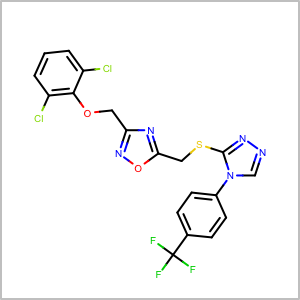
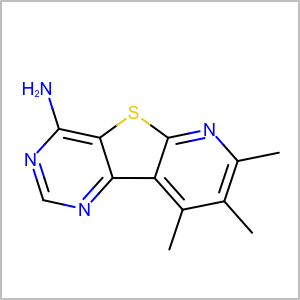
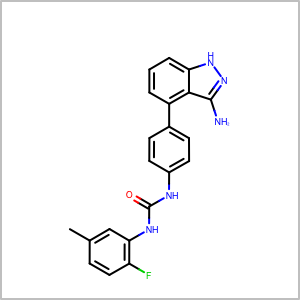
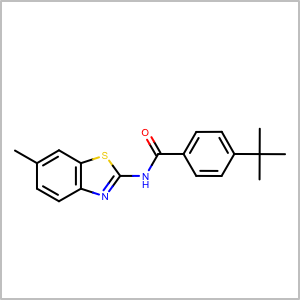
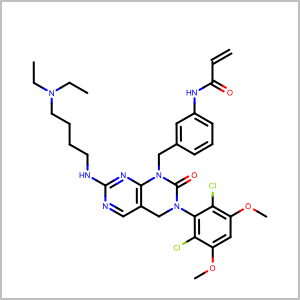
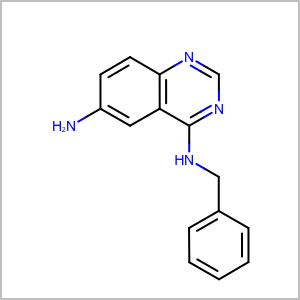
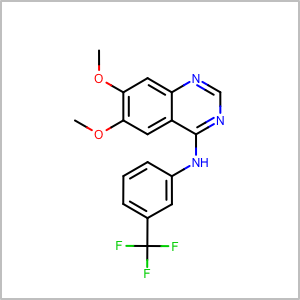
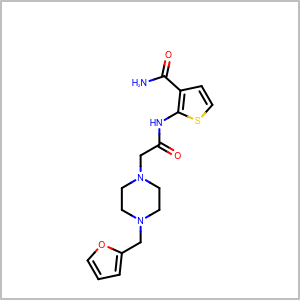
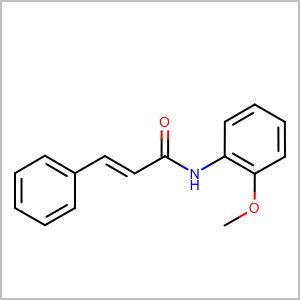
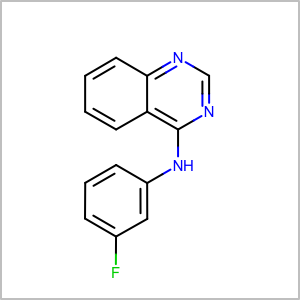
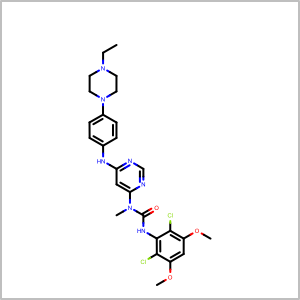
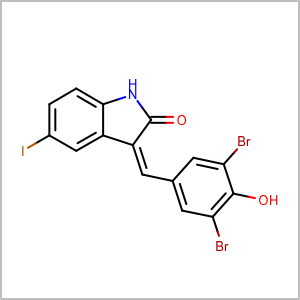
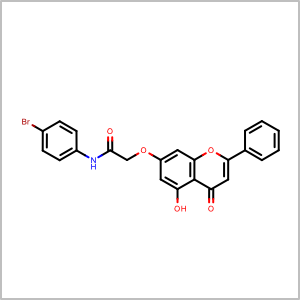
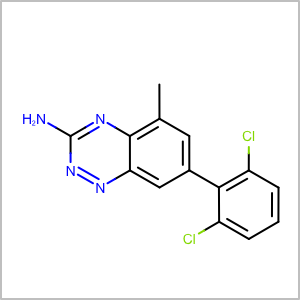
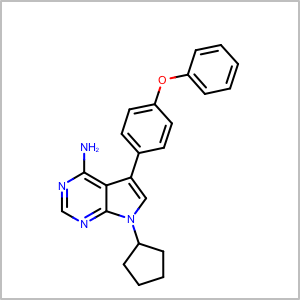
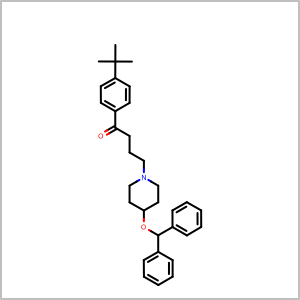
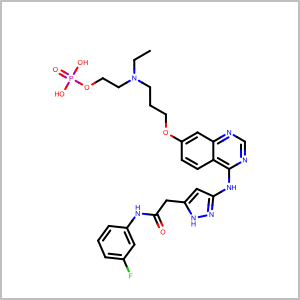
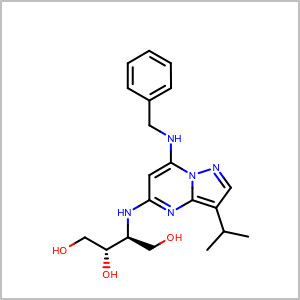
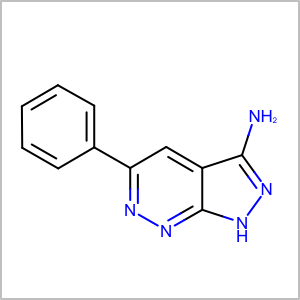
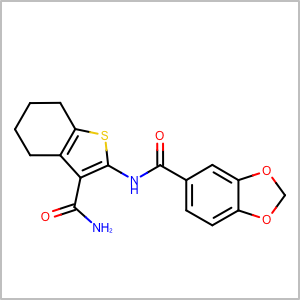
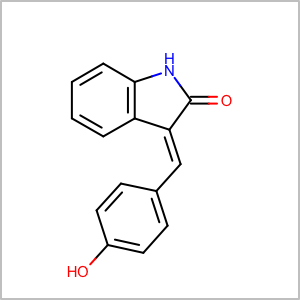
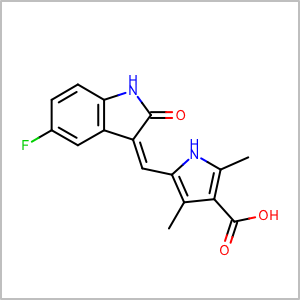
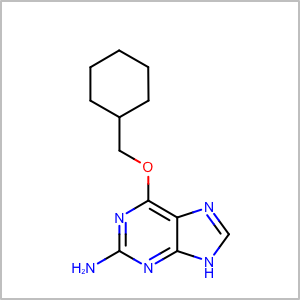
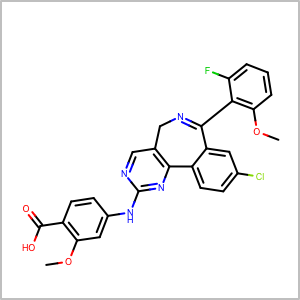
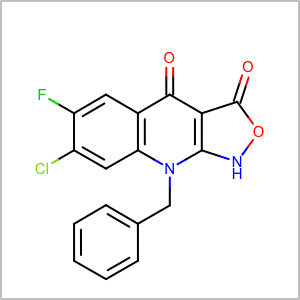
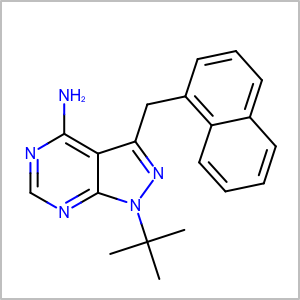
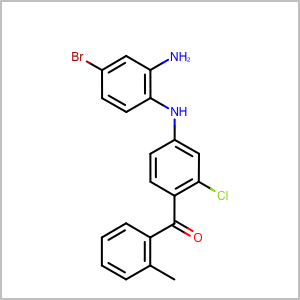
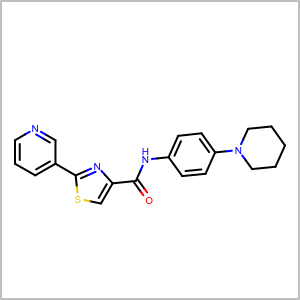
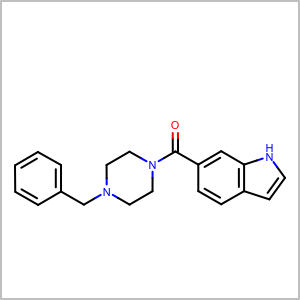
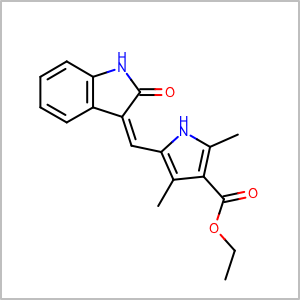
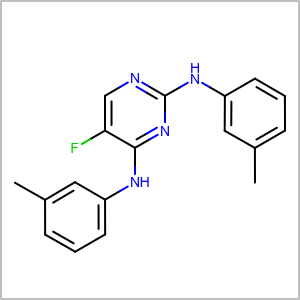
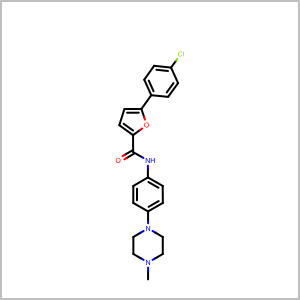
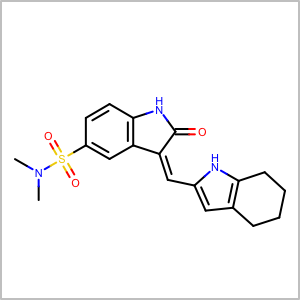
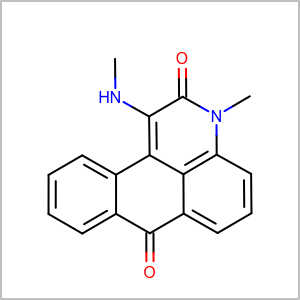
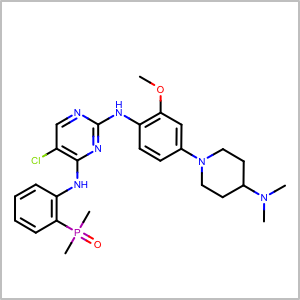
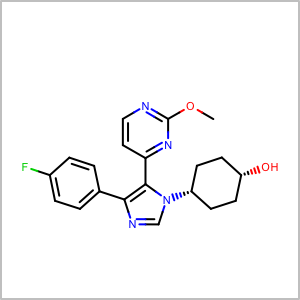
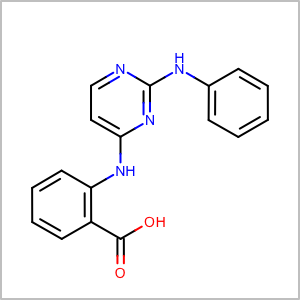
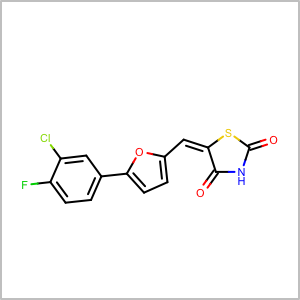
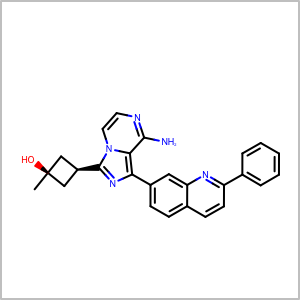
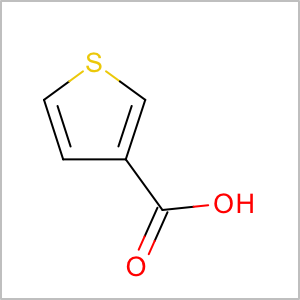
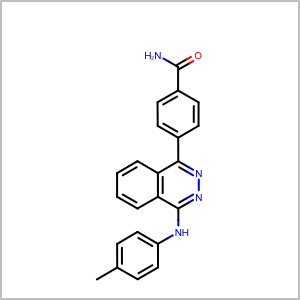
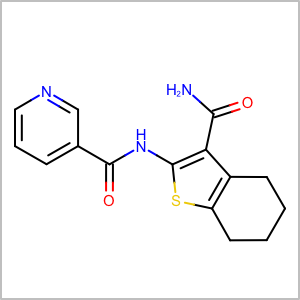
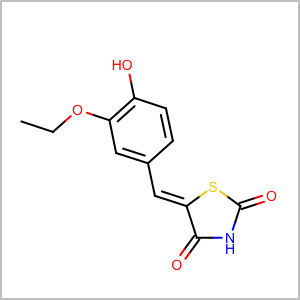
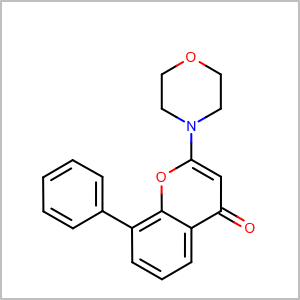
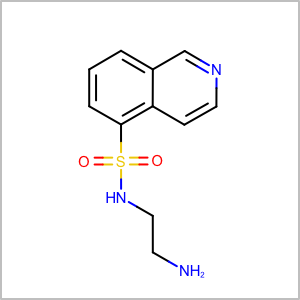
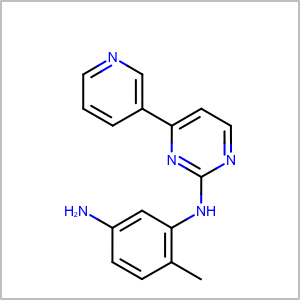
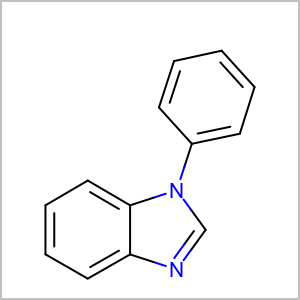
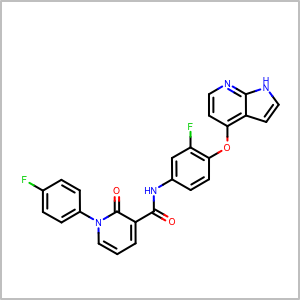
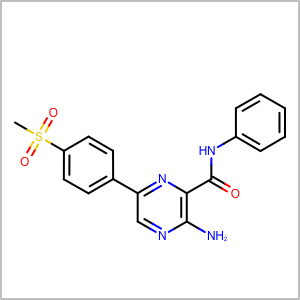
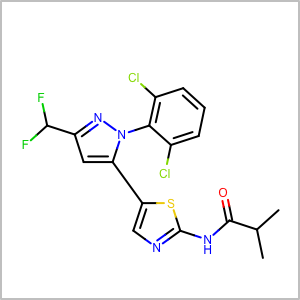
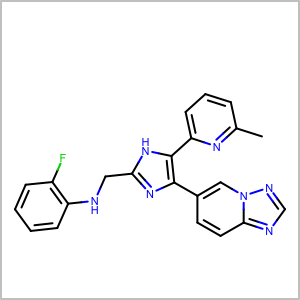
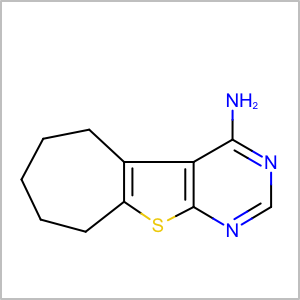
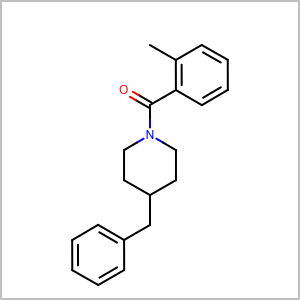
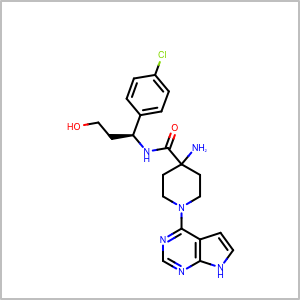
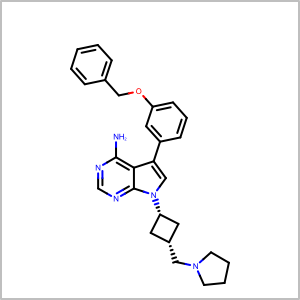
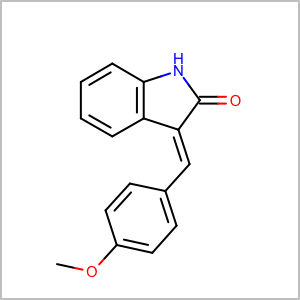
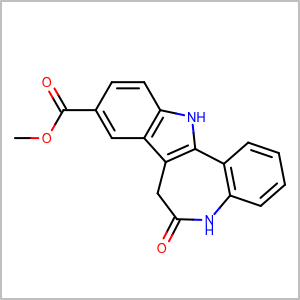
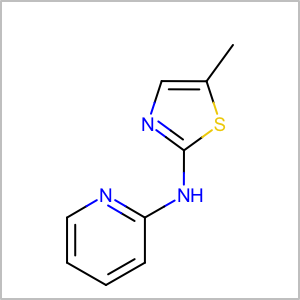
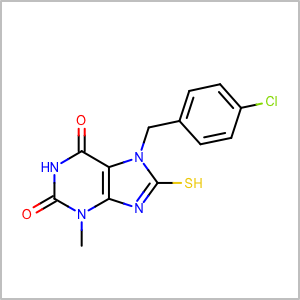
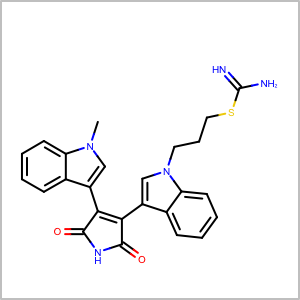
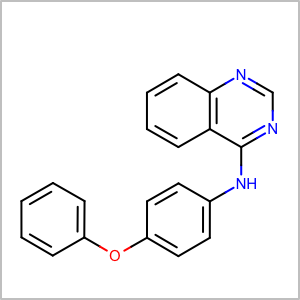
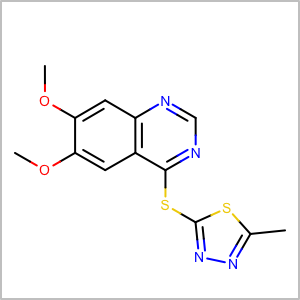
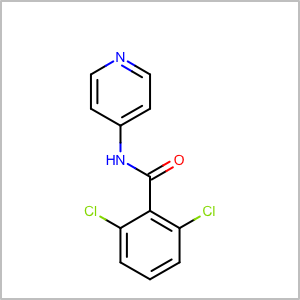
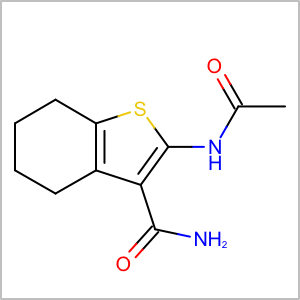
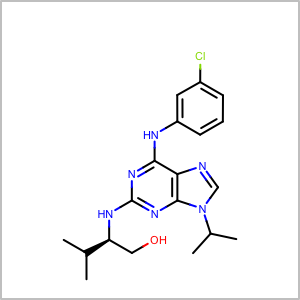
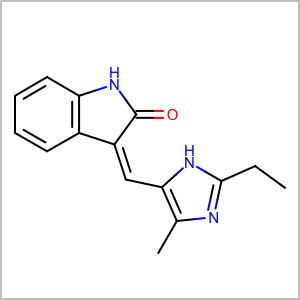
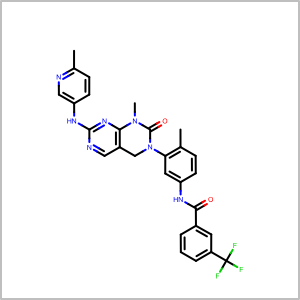
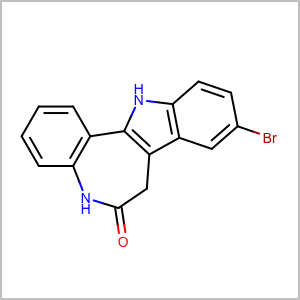
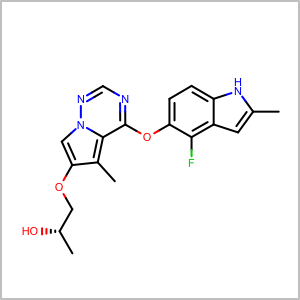
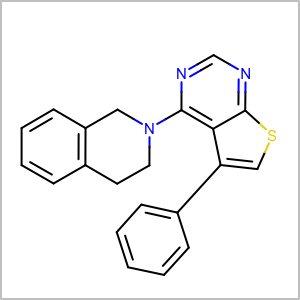
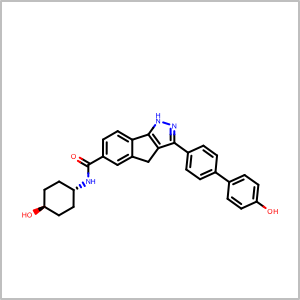
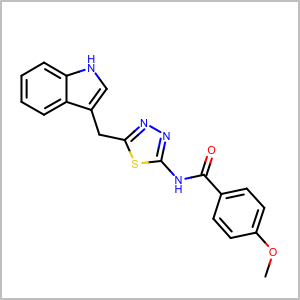
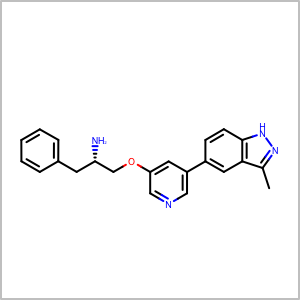
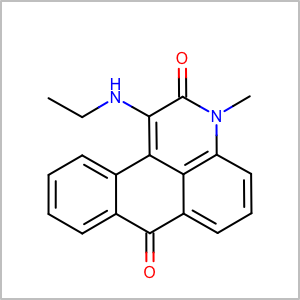
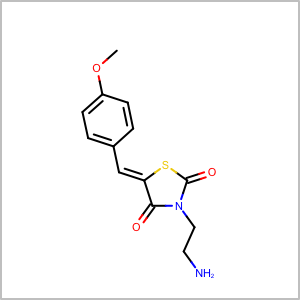
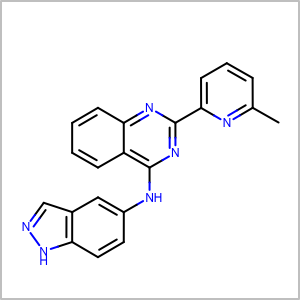
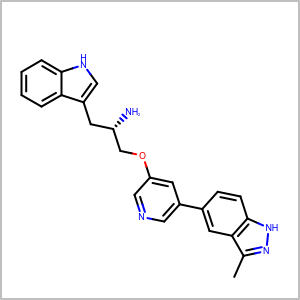
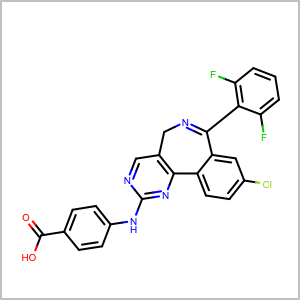
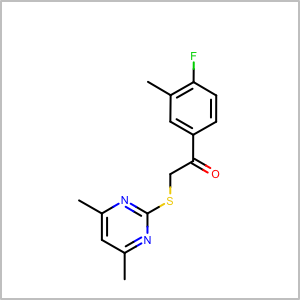
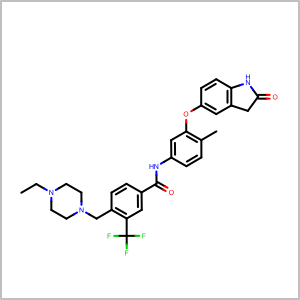
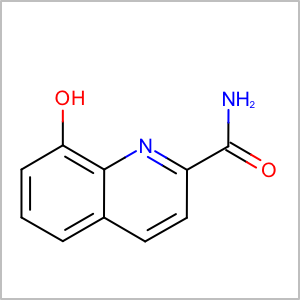
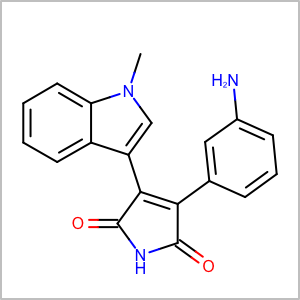
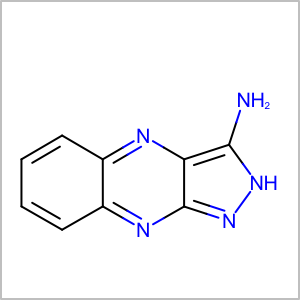
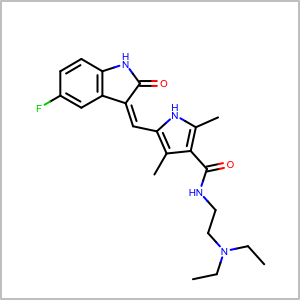
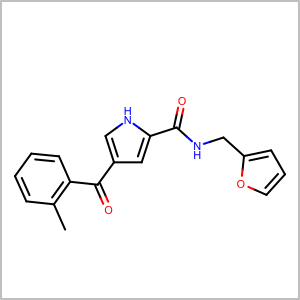
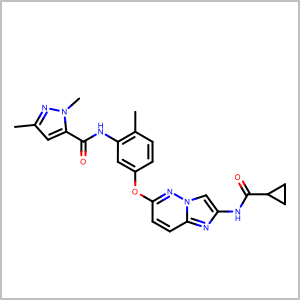
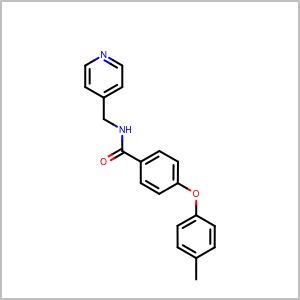
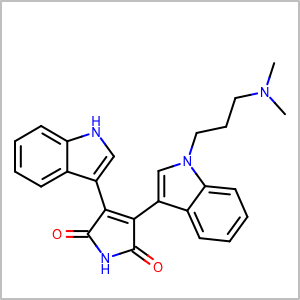
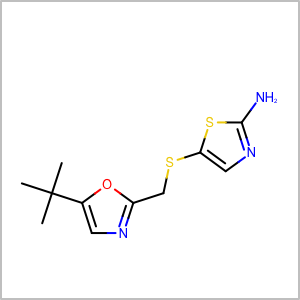
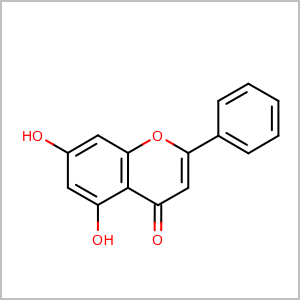
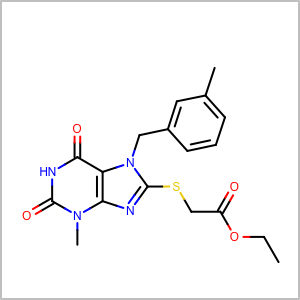
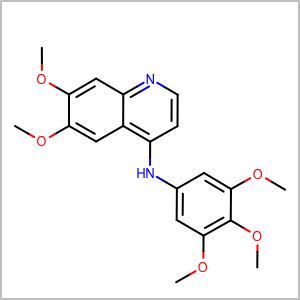
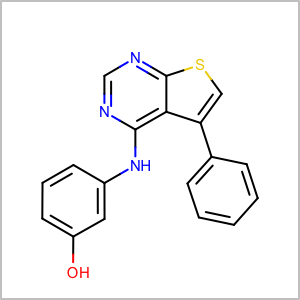
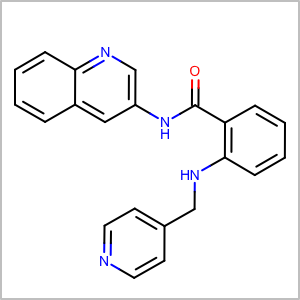
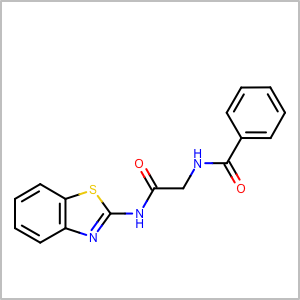
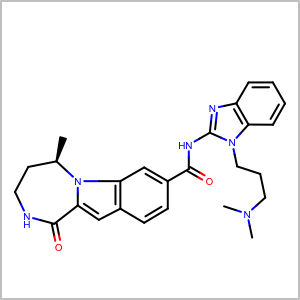
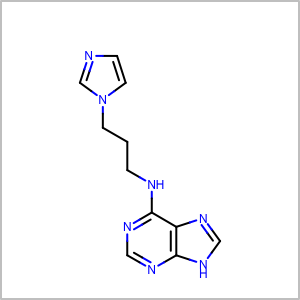
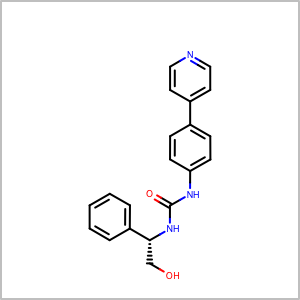
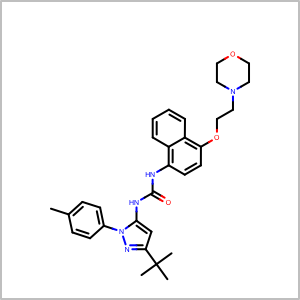
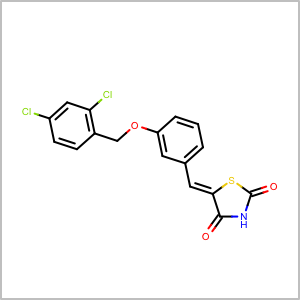

In [28]:
oenb.render_dataframe(df_int.iloc[0:100,:], width=300, height=300)

#### Quick look into distribution of chemical properties

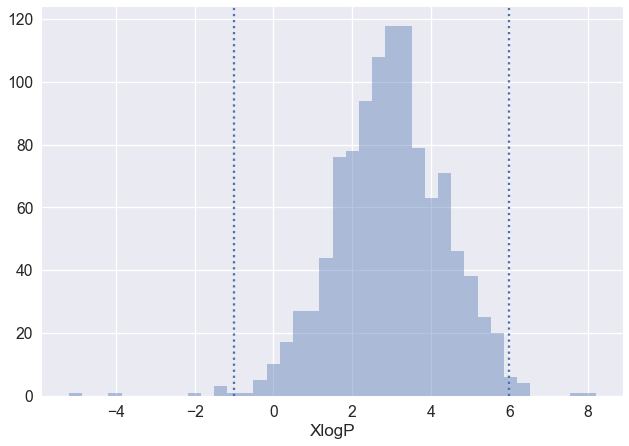

In [29]:
sns.distplot(df_int.XlogP, kde=False, rug=False)
plt.axvline(x=-1, linestyle='dotted')
plt.axvline(x=6, linestyle='dotted')

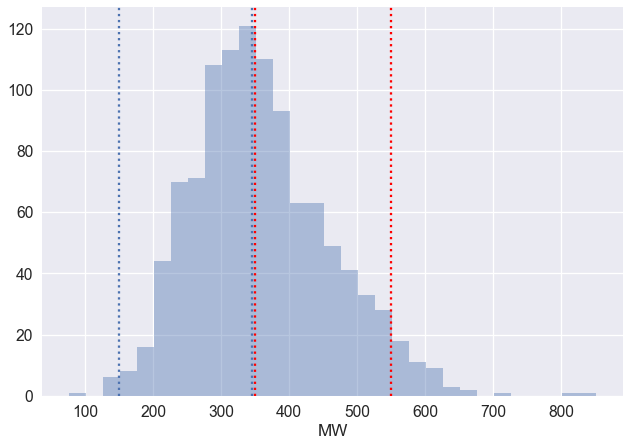

In [30]:
sns.distplot(df_int.MW, kde=False,rug=False)
plt.axvline(x=150, linestyle='dotted')
plt.axvline(x=345, linestyle='dotted')
plt.axvline(x=350, linestyle='dotted', color = "red")
plt.axvline(x=550, linestyle='dotted', color = "red")

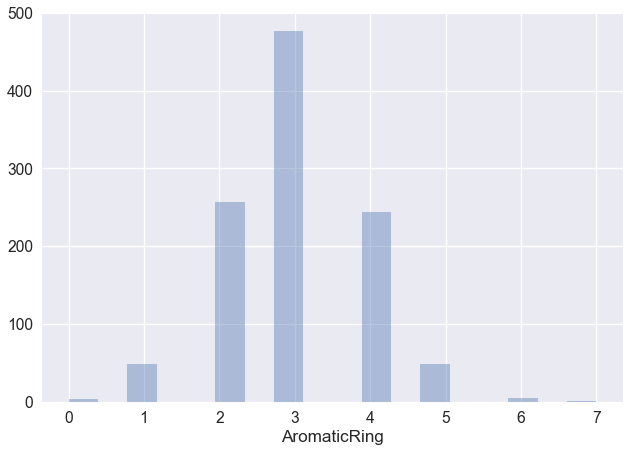

In [31]:
sns.distplot(df_int.AromaticRing, kde=False)